# **Instructions for Innovation Lab**

Dataset
https://github.com/abhinav-bhardwaj/IoT-Network-Intrusion-Detection-System-UNSW-NB15

Split dataset into three parts : [So 3 different notebooks you need to make ]
70-30
75-25
80-20

Implement these feature selection technique. You need to combine them into a single Google Colab notebook later on. At the start you can practise individual notebooks. Then later on we need to combine all feature selection in to a single Google colab notebook.

https://github.com/anujdutt9/Feature-Selection-for-Machine-Learning

https://github.com/ttungl/feature-selection-for-machine-learning

Implement all these algos for classification for your dataset which is given [Single Colab Notebook. Share On Github as Pvt notebook mayank265@gmail.com]
[Implement all algos for 70-30, 75-25, 80-20]

1. AdaBoost
2. Artificial Neural Network (ANN)
3. Bagging (Bootstrap Aggregating)
4. Bayesian network classifiers
5. Categorical Naive Bayes
6. Convolutional Neural Network (CNN)
7. Decision Trees
8. Deep Neural Network (DNN)
9. Gaussian Process Classification
10. Gradient Boosting (e.g., XGBoost & LightGBM)
11. J48
12. K-Nearest neighbour (KNN) Classifier
13. Linear Discriminant Analysis (LDA)
14. Logistic Regression
15. Multiclass Classification with One-vs-Rest (OvR) or One-vs-One (OvO)
16. Naive Bayes
17. Passive Aggressive Classifier
18. Perceptron
19. Quadratic Discriminant Analysis (QDA)
20. Random Forest
21. Recurrent Neural Network (RNN)
22. Ridge Classifier
23. Sparse auto-encoder
24. Support Vector Machines (SVM)

These are metrics you need to compute for the above ML methods
1. Accuracy
2. ANNOVA (Statistical technique)
3. APIM Score
4. AUC - ROC Area
5. Balanced Accuracy (BACC)
6. capture rate
7. Classification accuracy
8. Cohen Kappa score
9. Conditional Average Treatment Effect (CPE)
10. Confusion Matrix
11. Correct classification rate
12. Correlation Coefficient
13. coverage capture rate
14. coverage rate
15. Degree of Dependency (DoD)
16. Detection rate
17. Detection time
18. F1-Score
19. Fall-out rate
20. False alarm rate
21. False Negative rate (FNR)
22. False Positive rate (FPR)
23. Feature importance scores
24. FFS (Fast Feature Selection)
25. F-measure
26. Fraction of positives correctly identified (FPC)
27. F-Ratio
28. F-test
29. GAN (Generative Adversarial Network) loss
30. GINI Index
31. G-Mean
32. Hamming loss
33. Hit Rate
34. In addition compute the following metrics too.
35. Jaccard score
36. Kappa Statistic
37. Kolmogorov-Smirnov (KS -statistic)
38. Least Square Regression Error
39. LOF (Local Outlier Factor) Score
40. Log loss
41. Matthews correlation coefficient (MCC)
42. Maximal Information Compression Index
43. Mean absolute error (MSE)
44. Mean estimate
45. Model predictive power
46. Negative Predictive Value (NPV)
47. Positive predictive value (PPV)
48. Precision
49. Prediction time
50. Recall
51. Relative Absolute Error (RSE)
52. Root mean squared error (RMSE)
53. Selectivity
54. Sensitivity
55. Specificity
56. Sum of Squares
57. Testing time
58. Training time
59. True negative rate (TNR)
60. True positive rate (TPR)
61. True reject rate

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
from mlxtend.feature_selection import ExhaustiveFeatureSelector
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras import regularizers
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Importing Datasets

In [4]:
complete_df = pd.read_csv('/content/drive/MyDrive/Innovation Lab/IoT-Network-Intrusion-Detection-System-UNSW-NB15-master/datasets/UNSW_NB15.csv')
complete_df = complete_df.drop("id", axis = 'columns')

complete_df.head()

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,0.121478,tcp,-,FIN,6,4,258,172,74.087490,252,...,1,1,0,0,0,1,1,0,Normal,0
1,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,62,...,1,2,0,0,0,1,6,0,Normal,0
2,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,62,...,1,3,0,0,0,2,6,0,Normal,0
3,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,62,...,1,3,1,1,0,2,1,0,Normal,0
4,0.449454,tcp,-,FIN,10,6,534,268,33.373826,254,...,1,40,0,0,0,2,39,0,Normal,0


In [5]:
# complete_features = pd.read_csv('/content/drive/MyDrive/Innovation Lab/IoT-Network-Intrusion-Detection-System-UNSW-NB15-master/datasets/UNSW_NB15_features.csv')
# complete_features.head()

In [6]:
# bin_data = pd.read_csv('/content/drive/MyDrive/Innovation Lab/IoT-Network-Intrusion-Detection-System-UNSW-NB15-master/datasets/bin_data.csv')
# bin_data.head()

In [7]:
# multi_data = pd.read_csv('/content/drive/MyDrive/Innovation Lab/IoT-Network-Intrusion-Detection-System-UNSW-NB15-master/datasets/multi_data.csv')
# multi_data.head()

# Preprocessing


*   NA and Dtypes analysis
*   Remove duplicates
*   Scaling
*   Encoding
*   Train - Test Split












###Checking NA & Dtype values

In [8]:
null = complete_df.isnull().sum()

results = complete_df.dtypes

for i in range(len(null)):
    print(f'Col: {null.index[i]} \t\ttotal null: {null[i]} \t\tdtype: {results[i]}')

Col: dur 		total null: 0 		dtype: float64
Col: proto 		total null: 0 		dtype: object
Col: service 		total null: 0 		dtype: object
Col: state 		total null: 0 		dtype: object
Col: spkts 		total null: 0 		dtype: int64
Col: dpkts 		total null: 0 		dtype: int64
Col: sbytes 		total null: 0 		dtype: int64
Col: dbytes 		total null: 0 		dtype: int64
Col: rate 		total null: 0 		dtype: float64
Col: sttl 		total null: 0 		dtype: int64
Col: dttl 		total null: 0 		dtype: int64
Col: sload 		total null: 0 		dtype: float64
Col: dload 		total null: 0 		dtype: float64
Col: sloss 		total null: 0 		dtype: int64
Col: dloss 		total null: 0 		dtype: int64
Col: sinpkt 		total null: 0 		dtype: float64
Col: dinpkt 		total null: 0 		dtype: float64
Col: sjit 		total null: 0 		dtype: float64
Col: djit 		total null: 0 		dtype: float64
Col: swin 		total null: 0 		dtype: int64
Col: stcpb 		total null: 0 		dtype: int64
Col: dtcpb 		total null: 0 		dtype: int64
Col: dwin 		total null: 0 		dtype: int64
Col: tcprtt 		tota

### Duplicate Values

In [9]:
duplicate_values = complete_df.duplicated().sum()
duplicate_values

67601

### LabelEncoder

In [10]:
for i in range(len(complete_df.columns)):
    if results[i] == object:
        encoder = LabelEncoder()
        complete_df.iloc[:,i] = encoder.fit_transform(complete_df.iloc[:,i])

# Feature Scaling

###Standardization


In [11]:
scaler = StandardScaler()

scaler.fit(complete_df.iloc[:,:-2])
complete_df.iloc[:,:-2] = scaler.transform(complete_df.iloc[:,:-2])

complete_df.head()

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,-0.191029,0.151809,-0.702307,-0.409218,-0.104456,-0.135769,-0.049134,-0.102726,-0.576371,0.703839,...,-0.554373,-0.705529,-0.118590,-0.118590,-0.189768,-0.715714,-0.753074,-0.126508,6,0
1,-0.109485,0.151809,-0.702307,-0.409218,-0.046014,0.172599,-0.046410,0.188544,-0.576345,-1.141901,...,-0.554373,-0.614256,-0.118590,-0.118590,-0.189768,-0.715714,-0.288257,-0.126508,6,0
2,0.040699,0.151809,-0.702307,-0.409218,-0.089845,-0.026933,-0.048527,-0.012133,-0.576734,-1.141901,...,-0.554373,-0.522983,-0.118590,-0.118590,-0.189768,-0.595543,-0.288257,-0.126508,6,0
3,0.049729,0.151809,0.599130,-0.409218,-0.060624,-0.063212,-0.047016,-0.098563,-0.576737,-1.141901,...,-0.554373,-0.522983,7.814915,7.814915,-0.189768,-0.595543,-0.753074,-0.126508,6,0
4,-0.140417,0.151809,-0.702307,-0.409218,-0.075235,-0.117630,-0.047554,-0.102057,-0.576617,0.723268,...,-0.554373,2.854115,-0.118590,-0.118590,-0.189768,-0.595543,2.779535,-0.126508,6,0


#Train-Test *Split*

In [12]:
complete_multi_df = complete_df.drop("label", axis = 1)
complete_bin_df = complete_df.drop("attack_cat", axis = 1)

complete_x_bin = complete_bin_df.iloc[:,:-1]
complete_y_bin = complete_bin_df.iloc[:,-1]

complete_x_multi = complete_multi_df.iloc[:,0:-1]
complete_y_multi = complete_multi_df.iloc[:,-1]

x_train_bin, x_test_bin, y_train_bin, y_test_bin = train_test_split(complete_x_bin, complete_y_bin,
                                                                    random_state = 42, test_size = 0.9, shuffle = True)

x_train_multi, x_test_multi, y_train_multi, y_test_multi = train_test_split(complete_x_multi, complete_y_multi,
                                                                    random_state = 42, test_size = 0.3, shuffle = True)

# EDA
*   Outlier Detection
*   Balancing dataset (also preprocessing)
*   Univariate/Bivariate/Multivariate Analysis

### Outlier Detection using PCA

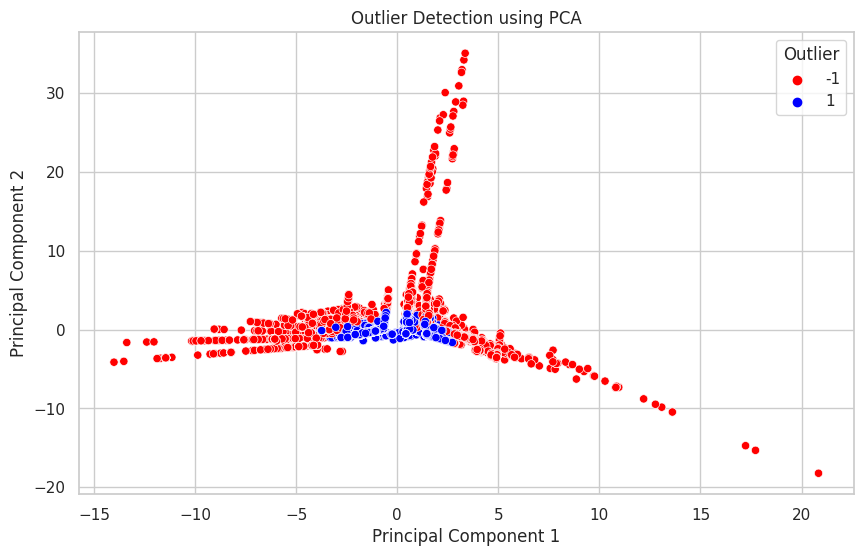

In [ ]:
clf = IsolationForest()
y_pred_bin = clf.fit_predict(x_train_bin)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(x_train_bin)

df = pd.DataFrame({'PCA1': X_pca[:, 0], 'PCA2': X_pca[:, 1], 'Outlier': y_pred_bin})

# Plot the 2D scatter plot with colors representing outliers
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Outlier', data=df, palette={-1: 'red', 1: 'blue'}, legend='full')
plt.title('Outlier Detection using PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

### Checking Balancing of the Dataset

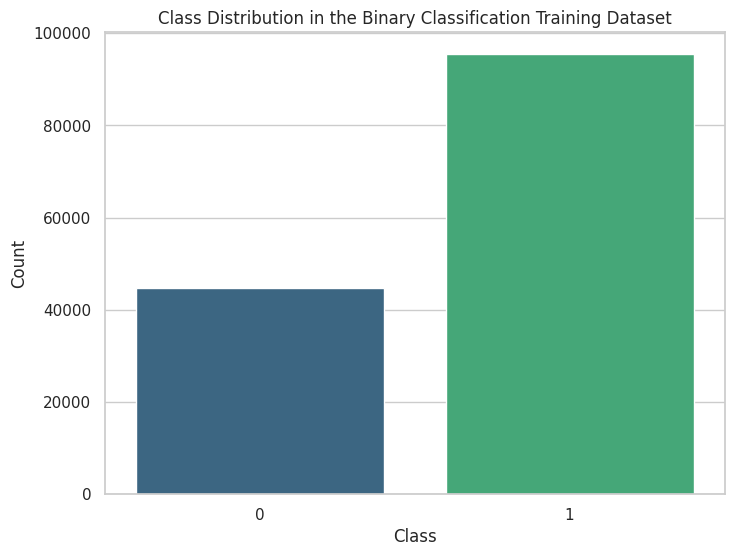

In [ ]:
target_variable = 'label'
y_train_bin_counts = y_train_bin.value_counts()
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")
sns.barplot(x=y_train_bin_counts.index, y=y_train_bin_counts.values, palette="viridis")
plt.title('Class Distribution in the Binary Classification Training Dataset')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

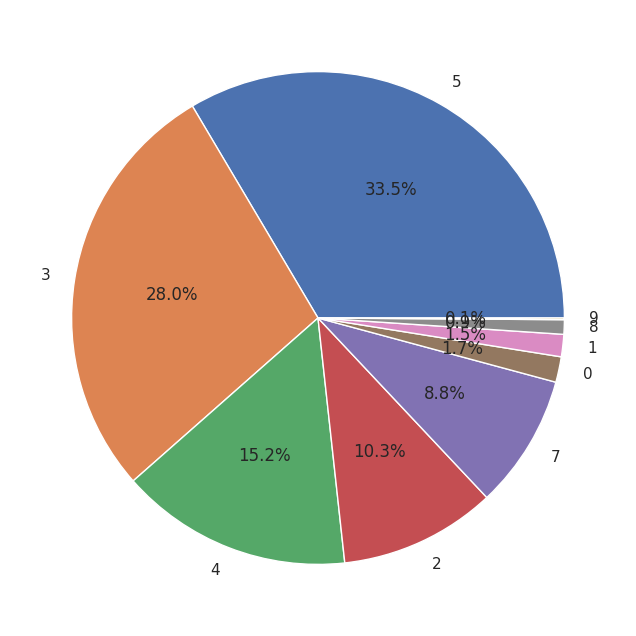

In [ ]:
validAttacks = complete_df[complete_df['label']==1]['attack_cat'].value_counts()
plt.figure(figsize = (15,8))
plt.pie(validAttacks,labels = validAttacks.index, autopct = '%1.1f%%')
plt.show()

# Feature Extraction

*   PCA



# Feature Selection


###Variance Threshold (Quasi Constant)

In [ ]:
VT = VarianceThreshold(threshold = 1)
VT.fit(x_train_bin)
VT.get_support()
col_drop = []
for i in range(len(x_train_bin.columns)):
  if VT.get_support()[i] == False:
    col_drop.append(x_train_bin.columns[i])
x_train_bin = x_train_bin.drop(columns = col_drop)
x_test_bin = x_test_bin.drop(columns = col_drop)

VT = VarianceThreshold(threshold = 1)
VT.fit(x_train_multi)
VT.get_support()
col_drop = []
for i in range(len(x_train_multi.columns)):
  if VT.get_support()[i] == False:
    col_drop.append(x_train_multi.columns[i])
x_train_multi = x_train_multi.drop(columns = col_drop)
x_test_multi = x_test_multi.drop(columns = col_drop)

In [ ]:
x_train_bin.shape,x_test_bin.shape,x_train_multi.shape,x_test_multi.shape

### Pearson Correlation Analysis

In [13]:
corr_matrix_multi = complete_multi_df.corr()
corr_matrix_bin = complete_bin_df.corr()

<Axes: >

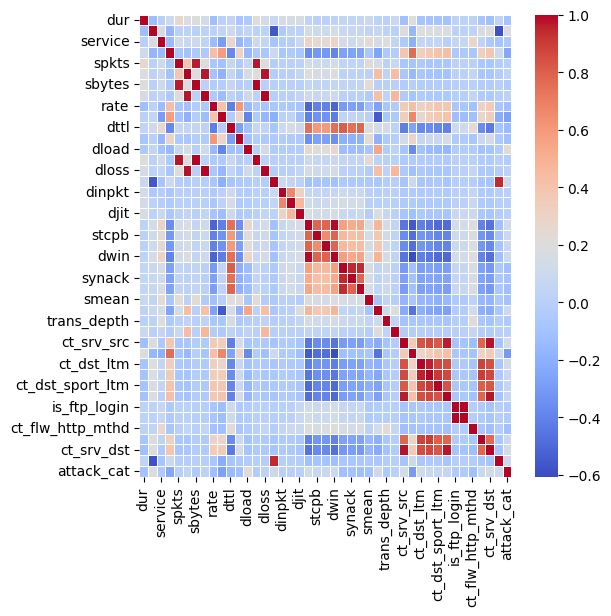

In [22]:
fig, ax = plt.subplots(figsize=(6,6))
sns.heatmap(corr_matrix_multi, cmap = 'coolwarm', annot = False, linewidths = 0.5, ax=ax)

<Axes: >

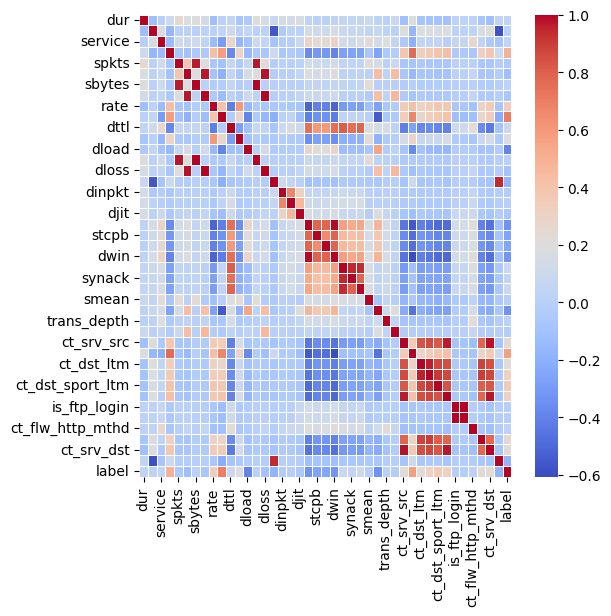

In [23]:
fig, ax = plt.subplots(figsize=(6,6))
sns.heatmap(corr_matrix_bin, cmap = 'coolwarm', annot = False, linewidths = 0.5, ax=ax)

In [14]:
col_drop_multi = []
for i in range(corr_matrix_multi.shape[0]):
  if abs(corr_matrix_multi.iloc[-1,i]) <= 0.125:
    col_drop_multi.append(complete_multi_df.columns[i])
x_train_multi = x_train_multi.drop(columns = col_drop_multi)
x_test_multi = x_test_multi.drop(columns = col_drop_multi)

col_drop_bin = []
for i in range(corr_matrix_bin.shape[0]):
  if abs(corr_matrix_bin.iloc[-1,i]) <= 0.3:
    col_drop_bin.append(complete_bin_df.columns[i])
x_train_bin = x_train_bin.drop(columns = col_drop_bin)
x_test_bin = x_test_bin.drop(columns = col_drop_bin)

In [10]:
# x_train_bin.shape,x_test_bin.shape,x_train_multi.shape,x_test_multi.shape

((122738, 11), (52603, 11), (122738, 9), (52603, 9))

###Exhaustive Feature Selection

In [ ]:
clf = DecisionTreeClassifier()
efs = ExhaustiveFeatureSelector(clf,min_features = 5,max_features = 10,n_jobs = -1)
efs.fit(x_train_bin,y_train_bin)
efs.best_feature_names_

col_drop = [col for col in efs.best_feature_names_
            if col not in complete_bin_df.columns]
# complete_bin_df = complete_bin_df.drop(columns = col_drop)

# complete_bin_df.shape
col_drop,efs.best_feature_names_

###Mutual Info

In [ ]:
top_10_bin = SelectKBest(mutual_info_classif,k=10)
top_10_bin.fit(x_train_bin,y_train_bin)

# top_10_bin.get_support()

#***HARD CODE ALERT***

L = np.array([ True, False, False, False, False, False,  True,  True,  True,
                True,  True,  True, False, False, False, False, False, False,
              False, False, False, False, False, False, False, False,  True,
                True, False, False, False,  True, False, False, False, False,
              False, False, False, False, False, False])

# label_bool = np.array([True])
# L = np.concatenate((L, label_bool))

col_drop = [col for col in x_train_bin.columns
            if col not in x_train_bin.columns[L]]

x_train_bin = x_train_bin.drop(columns = col_drop)
x_test_bin = x_test_bin.drop(columns = col_drop)

x_train_bin.shape,x_test_bin.shape

((140272, 10), (35069, 10))

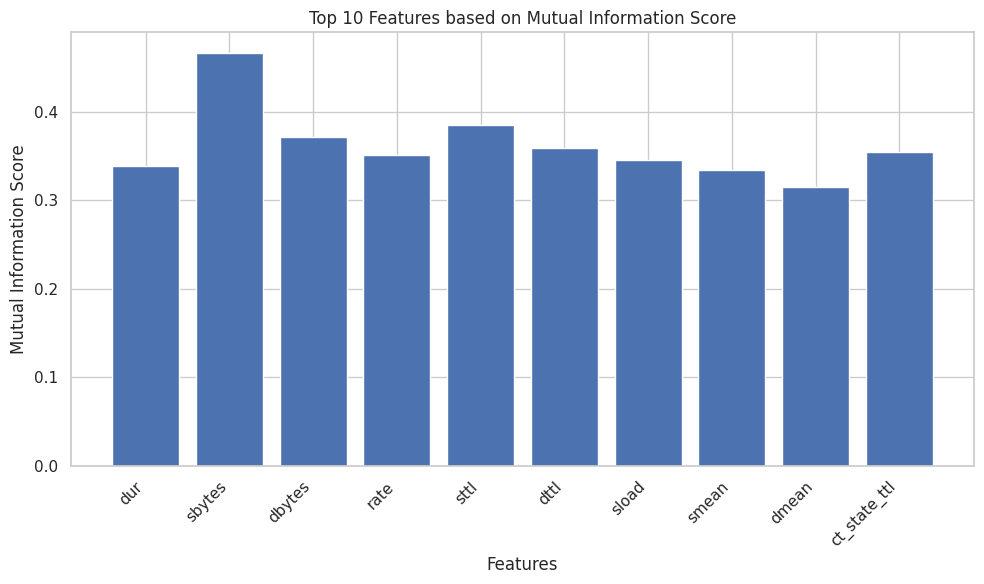

In [ ]:
feature_scores = top_10_bin.scores_

# Get the names of the selected features
selected_feature_names = x_train_bin.columns

# Create a bar graph for the top 10 features and their scores
plt.figure(figsize=(10, 6))
plt.bar(selected_feature_names, feature_scores[top_10_bin.get_support()])
plt.xlabel('Features')
plt.ylabel('Mutual Information Score')
plt.title('Top 10 Features based on Mutual Information Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
# top_10_bin = SelectKBest(mutual_info_classif,k=10)
# top_10_bin.fit(x_train_multi,y_train_multi)

# top_10_bin.get_support()

# ***HARD CODE ALERT***

# L = np.array([ True, False, False, False, False, False,  True,  True,  True,
#        False, False,  True, False, False, False, False, False, False,
#        False, False, False, False, False, False, False, False,  True,
#         True, False, False, False,  True, False, False,  True, False,
#        False, False, False, False,  True, False])

# label_bool = np.array([True])
# L = np.concatenate((L, label_bool))

# col_drop = [col for col in x_train_multi.columns
#             if col not in x_train_multi.columns[L]]

# x_train_multi = x_train_multi.drop(columns = col_drop)
# x_test_multi = x_test_multi.drop(columns = col_drop)

###ROC Feature Selection

In [ ]:
roc_values = []
i = 1
for feature in x_train_bin.columns:
  clf = DecisionTreeClassifier()
  clf.fit(x_train_bin[feature].to_frame(),y_train_bin)
  y_pred_bin = clf.predict_proba(x_test_bin[feature].to_frame())
  roc_values.append(roc_auc_score(y_test_bin,y_pred_bin[:,1]))

roc_values = pd.Series(roc_values)
roc_values.index = x_train_bin.columns
roc_values_sorted = roc_values.sort_values(ascending = False)

i = 1
top10_feature = []
for feature in roc_values_sorted.index:
  if i>10:
    break
  else:
    top10_feature.append(feature)
    i = i + 1

x_train_bin = x_train_bin.loc[:,top10_feature]
x_test_bin = x_test_bin.loc[:,top10_feature]
x_train_bin.head()

,sbytes,smean,dbytes,dmean,rate,ct_state_ttl,dttl,sttl,dpkts,sload
96203,-0.046067,-0.282161,-0.095862,0.080624,-0.576621,-0.318711,1.560002,-1.141901,-0.099490,-0.389914
58960,-0.049465,-0.179560,-0.103923,-0.480703,0.094951,0.729064,-0.720406,0.723268,-0.172047,0.081945
65069,-0.015878,0.978363,-0.099203,-0.260043,-0.576628,-0.318711,1.560002,0.723268,-0.063212,-0.389708
64133,-0.046250,-0.296818,-0.074547,1.152953,-0.576705,-0.318711,1.560002,-1.141901,-0.081351,-0.389944
111445,-0.049465,-0.179560,-0.103923,-0.480703,0.632367,0.729064,-0.720406,0.723268,-0.172047,0.459479


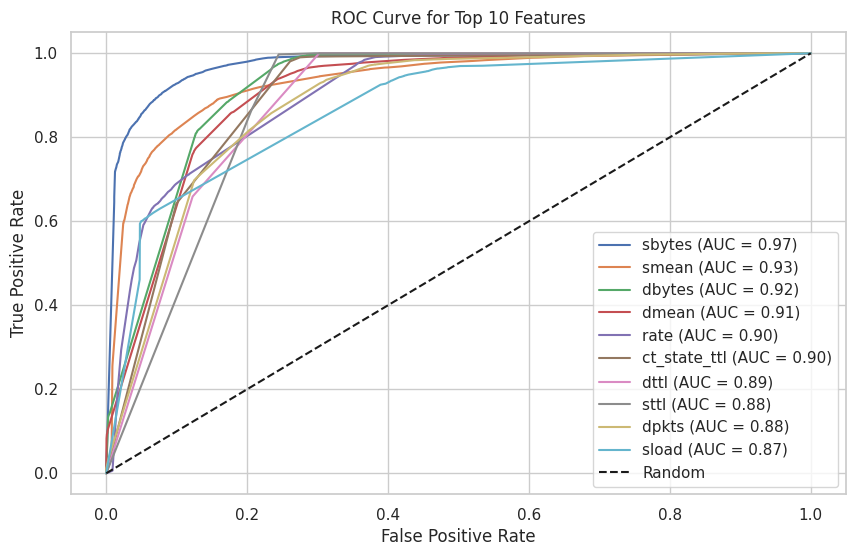

In [ ]:
plt.figure(figsize=(10, 6))
for feature in roc_values_sorted.index[:10]:
    clf = DecisionTreeClassifier()
    clf.fit(x_train_bin[feature].to_frame(), y_train_bin)
    y_pred_bin = clf.predict_proba(x_test_bin[feature].to_frame())[:, 1]
    fpr, tpr, _ = roc_curve(y_test_bin, y_pred_bin)
    plt.plot(fpr, tpr, label=f'{feature} (AUC = {roc_auc_score(y_test_bin, y_pred_bin):.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Top 10 Features')
plt.legend()
plt.show()

In [ ]:
# roc_values = []
# i = 1
# for feature in x_train_multi.columns:
#   clf = DecisionTreeClassifier()
#   clf.fit(x_train_multi[feature].to_frame(),y_train_multi)
#   y_pred_bin = clf.predict_proba(x_test_multi[feature].to_frame())
#   roc_values.append(roc_auc_score(y_test_bin,y_pred_bin[:,1]))

# roc_values = pd.Series(roc_values)
# roc_values.index = x_train_multi.columns
# roc_values_sorted = roc_values.sort_values(ascending = False)

# i = 1
# top10_feature = []
# for feature in roc_values_sorted.index:
#   if i>10:
#     break
#   else:
#     top10_feature.append(feature)
#     i = i + 1

# x_train_multi = x_train_multi.loc[:,top10_feature]
# x_test_multi = x_test_multi.loc[:,top10_feature]
# x_train_multi.head()

# Model Training and Testing

In [ ]:
# clf = AdaBoostClassifier(n_estimators = 100)

# clf.fit(x_train_bin,y_train_bin)
# y_pred_bin = clf.predict(x_test_bin)

# accsc = accuracy_score(y_test_bin,y_pred_bin)
# f1 = f1_score(y_test_bin,y_pred_bin)
# ps = precision_score(y_test_bin,y_pred_bin)
# rs = recall_score(y_test_bin,y_pred_bin)

# Score = {"Accuracy Score":accsc,"Precision Score":ps,"Recall Score":rs,"F1 Score":f1}

# print(Score)

In [ ]:
# adb = AdaBoostClassifier(n_estimators = 100)

# adb.fit(x_train_bin,y_train_bin)
# y_pred_bin = adb.predict(x_test_bin)

# accsc = accuracy_score(y_test_bin,y_pred_bin)
# f1 = f1_score(y_test_bin,y_pred_bin)
# ps = precision_score(y_test_bin,y_pred_bin)
# rs = recall_score(y_test_bin,y_pred_bin)

# Score = {"Accuracy Score":accsc,"Precision Score":ps,"Recall Score":rs,"F1 Score":f1}

# print(Score)

In [ ]:
# clf = GaussianNB()

# clf.fit(x_train_bin,y_train_bin)
# y_pred_bin = clf.predict(x_test_bin)

# accsc = accuracy_score(y_test_bin,y_pred_bin)
# f1 = f1_score(y_test_bin,y_pred_bin)
# ps = precision_score(y_test_bin,y_pred_bin)
# rs = recall_score(y_test_bin,y_pred_bin)

# Score = {"Accuracy Score":accsc,"Precision Score":ps,"Recall Score":rs,"F1 Score":f1}

# print(Score)

In [ ]:
# clf = GaussianNB()

# clf.fit(x_train_bin,y_train_bin)
# y_pred_bin = clf.predict(x_test_bin)

# accsc = accuracy_score(y_test_bin,y_pred_bin)
# f1 = f1_score(y_test_bin,y_pred_bin)
# ps = precision_score(y_test_bin,y_pred_bin)
# rs = recall_score(y_test_bin,y_pred_bin)

# Score = {"Accuracy Score":accsc,"Precision Score":ps,"Recall Score":rs,"F1 Score":f1}

# print(Score)

In [ ]:
# clf = KNeighborsClassifier(weights = 'distance')

# clf.fit(x_train_bin,y_train_bin)
# y_pred_bin = clf.predict(x_test_bin)

# accsc = accuracy_score(y_test_bin,y_pred_bin)
# f1 = f1_score(y_test_bin,y_pred_bin)
# ps = precision_score(y_test_bin,y_pred_bin)
# rs = recall_score(y_test_bin,y_pred_bin)

# Score = {"Accuracy Score":accsc,"Precision Score":ps,"Recall Score":rs,"F1 Score":f1}

# print(Score)

In [ ]:
# clf = KNeighborsClassifier(weights = 'distance')

# clf.fit(x_train_bin,y_train_bin)
# y_pred_bin = clf.predict(x_test_bin)

# accsc = accuracy_score(y_test_bin,y_pred_bin)
# f1 = f1_score(y_test_bin,y_pred_bin)
# ps = precision_score(y_test_bin,y_pred_bin)
# rs = recall_score(y_test_bin,y_pred_bin)

# Score = {"Accuracy Score":accsc,"Precision Score":ps,"Recall Score":rs,"F1 Score":f1}

# print(Score)

In [25]:
clf = DecisionTreeClassifier()

clf.fit(x_train_bin,y_train_bin)
y_pred_bin = clf.predict(x_test_bin)

accsc = accuracy_score(y_test_bin,y_pred_bin)
f1 = f1_score(y_test_bin,y_pred_bin)
ps = precision_score(y_test_bin,y_pred_bin)
rs = recall_score(y_test_bin,y_pred_bin)

Score = {"Accuracy Score":accsc,"Precision Score":ps,"Recall Score":rs,"F1 Score":f1}

print(Score)

{'Accuracy Score': 0.9286787024656701, 'Precision Score': 0.9462766598944273, 'Recall Score': 0.9491560121340703, 'F1 Score': 0.9477141490019001}


In [26]:
# clf = DecisionTreeClassifier()

# clf.fit(x_train_bin,y_train_bin)
# y_pred_bin = clf.predict(x_test_bin)

# accsc = accuracy_score(y_test_bin,y_pred_bin)
# f1 = f1_score(y_test_bin,y_pred_bin)
# ps = precision_score(y_test_bin,y_pred_bin)
# rs = recall_score(y_test_bin,y_pred_bin)

# Score = {"Accuracy Score":accsc,"Precision Score":ps,"Recall Score":rs,"F1 Score":f1}

# print(Score)

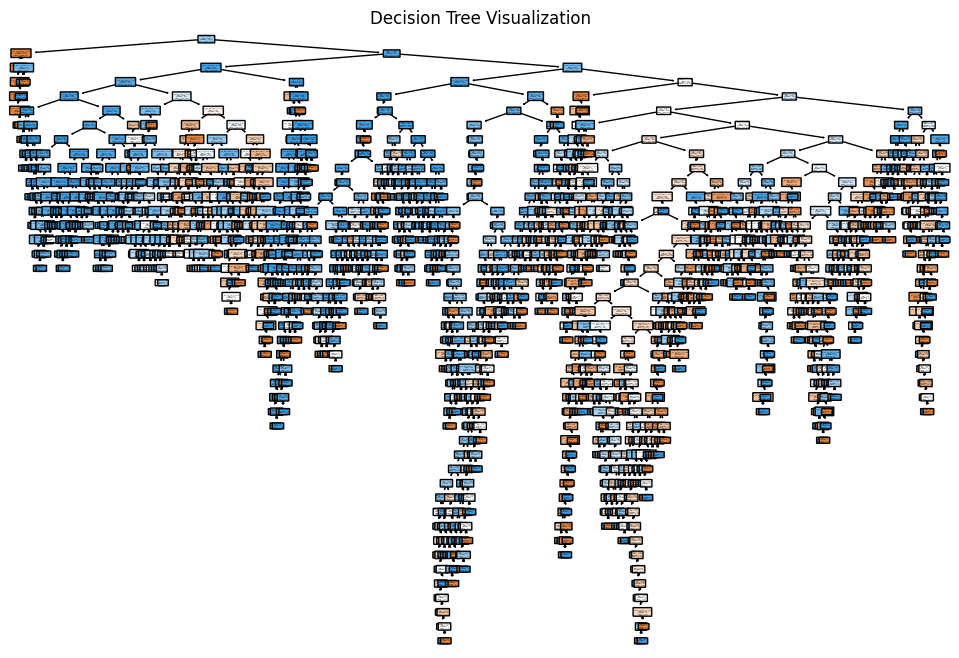

In [27]:
plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True, feature_names=x_train_bin.columns, class_names=y_train_bin.unique().astype(str), rounded=True)
plt.title("Decision Tree Visualization")
plt.show()

In [ ]:
# clf = OneVsRestClassifier(DecisionTreeClassifier()).fit(x_train_multi,y_train_multi)

# y_pred_multi = clf.predict(x_test_multi)

# accsc = accuracy_score(y_test_multi,y_pred_multi)
# f1 = f1_score(y_test_multi,y_pred_multi,average='weighted')
# ps = precision_score(y_test_multi,y_pred_multi,average='weighted')
# rs = recall_score(y_test_multi,y_pred_multi,average='weighted')

# Score = {"Accuracy Score":accsc,"Precision Score":ps,"Recall Score":rs,"F1 Score":f1}

# print(Score)

In [ ]:
# clf = OneVsOneClassifier(DecisionTreeClassifier()).fit(x_train_multi,y_train_multi)

# y_pred_multi = clf.predict(x_test_multi)

# accsc = accuracy_score(y_test_multi,y_pred_multi)
# f1 = f1_score(y_test_multi,y_pred_multi,average='weighted')
# ps = precision_score(y_test_multi,y_pred_multi,average='weighted')
# rs = recall_score(y_test_multi,y_pred_multi,average='weighted')

# Score = {"Accuracy Score":accsc,"Precision Score":ps,"Recall Score":rs,"F1 Score":f1}

# print(Score)

In [ ]:
# clf = SVC()

# clf.fit(x_train_bin,y_train_bin)
# y_pred_bin = clf.predict(x_test_bin)

# accsc = accuracy_score(y_test_bin,y_pred_bin)
# f1 = f1_score(y_test_bin,y_pred_bin)
# ps = precision_score(y_test_bin,y_pred_bin)
# rs = recall_score(y_test_bin,y_pred_bin)

# Score = {"Accuracy Score":accsc,"Precision Score":ps,"Recall Score":rs,"F1 Score":f1}

# print(Score)

In [ ]:
# clf = RidgeClassifier()

# clf.fit(x_train_bin,y_train_bin)
# y_pred_bin = clf.predict(x_test_bin)

# accsc = accuracy_score(y_test_bin,y_pred_bin)
# f1 = f1_score(y_test_bin,y_pred_bin)
# ps = precision_score(y_test_bin,y_pred_bin)
# rs = recall_score(y_test_bin,y_pred_bin)

# Score = {"Accuracy Score":accsc,"Precision Score":ps,"Recall Score":rs,"F1 Score":f1}

# print(Score)

In [ ]:
# clf = RidgeClassifier()

# clf.fit(x_train_bin,y_train_bin)
# y_pred_bin = clf.predict(x_test_bin)

# accsc = accuracy_score(y_test_bin,y_pred_bin)
# f1 = f1_score(y_test_bin,y_pred_bin)
# ps = precision_score(y_test_bin,y_pred_bin)
# rs = recall_score(y_test_bin,y_pred_bin)

# Score = {"Accuracy Score":accsc,"Precision Score":ps,"Recall Score":rs,"F1 Score":f1}

# print(Score)

In [ ]:
# clf = SVC()

# clf.fit(x_train_bin,y_train_bin)
# y_pred_bin = clf.predict(x_test_bin)

# accsc = accuracy_score(y_test_bin,y_pred_bin)
# f1 = f1_score(y_test_bin,y_pred_bin)
# ps = precision_score(y_test_bin,y_pred_bin)
# rs = recall_score(y_test_bin,y_pred_bin)

# Score = {"Accuracy Score":accsc,"Precision Score":ps,"Recall Score":rs,"F1 Score":f1}

# print(Score)

In [ ]:
# clf = MultinomialNB()

# clf.fit(x_train_bin,y_train_bin)
# y_pred_bin = clf.predict(x_test_bin)

# accsc = accuracy_score(y_test_bin,y_pred_bin)
# f1 = f1_score(y_test_bin,y_pred_bin)
# ps = precision_score(y_test_bin,y_pred_bin)
# rs = recall_score(y_test_bin,y_pred_bin)

# Score = {"Accuracy Score":accsc,"Precision Score":ps,"Recall Score":rs,"F1 Score":f1}

# print(Score)

In [ ]:
# clf = MultinomialNB()

# clf.fit(x_train_bin,y_train_bin)we
# y_pred_bin = clf.predict(x_test_bin)

# accsc = accuracy_score(y_test_bin,y_pred_bin)
# f1 = f1_score(y_test_bin,y_pred_bin)
# ps = precision_score(y_test_bin,y_pred_bin)
# rs = recall_score(y_test_bin,y_pred_bin)

# Score = {"Accuracy Score":accsc,"Precision Score":ps,"Recall Score":rs,"F1 Score":f1}

# print(Score)

In [ ]:
# clf = PassiveAggressiveClassifier()

# clf.fit(x_train_bin,y_train_bin)
# y_pred_bin = clf.predict(x_test_bin)

# accsc = accuracy_score(y_test_bin,y_pred_bin)
# f1 = f1_score(y_test_bin,y_pred_bin)
# ps = precision_score(y_test_bin,y_pred_bin)
# rs = recall_score(y_test_bin,y_pred_bin)

# Score = {"Accuracy Score":accsc,"Precision Score":ps,"Recall Score":rs,"F1 Score":f1}

# print(Score)

In [ ]:
# clf = PassiveAggressiveClassifier()

# clf.fit(x_train_bin,y_train_bin)
# y_pred_bin = clf.predict(x_test_bin)

# accsc = accuracy_score(y_test_bin,y_pred_bin)
# f1 = f1_score(y_test_bin,y_pred_bin)
# ps = precision_score(y_test_bin,y_pred_bin)
# rs = recall_score(y_test_bin,y_pred_bin)

# Score = {"Accuracy Score":accsc,"Precision Score":ps,"Recall Score":rs,"F1 Score":f1}

# print(Score)

In [ ]:
# clf = GradientBoostingClassifier()

# clf.fit(x_train_bin,y_train_bin)
# y_pred_bin = clf.predict(x_test_bin)

# accsc = accuracy_score(y_test_bin,y_pred_bin)
# f1 = f1_score(y_test_bin,y_pred_bin)
# ps = precision_score(y_test_bin,y_pred_bin)
# rs = recall_score(y_test_bin,y_pred_bin)

# Score = {"Accuracy Score":accsc,"Precision Score":ps,"Recall Score":rs,"F1 Score":f1}

# print(Score)

In [ ]:
# clf = GradientBoostingClassifier()

# clf.fit(x_train_bin,y_train_bin)
# y_pred_bin = clf.predict(x_test_bin)

# accsc = accuracy_score(y_test_bin,y_pred_bin)
# f1 = f1_score(y_test_bin,y_pred_bin)
# ps = precision_score(y_test_bin,y_pred_bin)
# rs = recall_score(y_test_bin,y_pred_bin)

# Score = {"Accuracy Score":accsc,"Precision Score":ps,"Recall Score":rs,"F1 Score":f1}

# print(Score)

In [13]:
clf = RandomForestClassifier()

clf.fit(x_train_bin,y_train_bin)
y_pred_bin = clf.predict(x_test_bin)

accsc = accuracy_score(y_test_bin,y_pred_bin)
f1 = f1_score(y_test_bin,y_pred_bin)
ps = precision_score(y_test_bin,y_pred_bin)
rs = recall_score(y_test_bin,y_pred_bin)

Score = {"Accuracy Score":accsc,"Precision Score":ps,"Recall Score":rs,"F1 Score":f1}

print(Score)

{'Accuracy Score': 0.944470847670285, 'Precision Score': 0.9511927611735673, 'Recall Score': 0.9681560659763891, 'F1 Score': 0.9595994522897333}


Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.89      0.91     11169
           1       0.95      0.97      0.96     23900

    accuracy                           0.94     35069
   macro avg       0.94      0.93      0.93     35069
weighted avg       0.94      0.94      0.94     35069



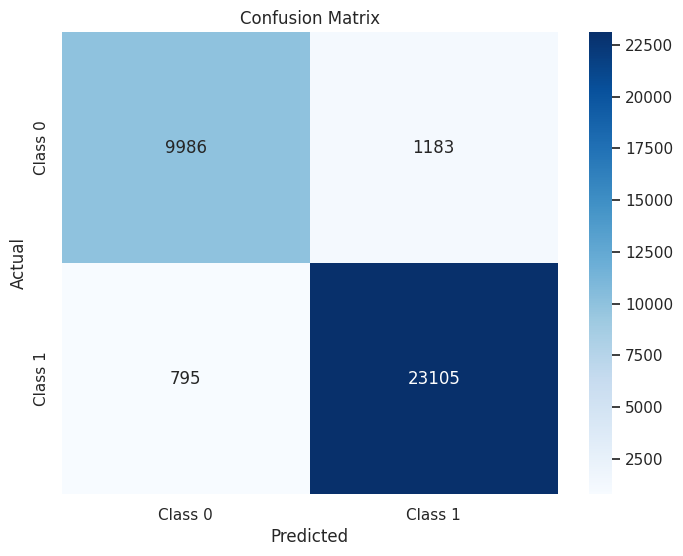

In [ ]:
cm = confusion_matrix(y_test_bin, y_pred_bin)

# Calculate accuracy
accuracy = accuracy_score(y_test_bin, y_pred_bin)

# Print classification report
print("Classification Report:\n", classification_report(y_test_bin, y_pred_bin))

# Plot confusion matrix as a heatmap
plt.figure(figsize=(4, 2))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
# clf = RandomForestClassifier()

# clf.fit(x_train_bin,y_train_bin)
# y_pred_bin = clf.predict(x_test_bin)

# accsc = accuracy_score(y_test_bin,y_pred_bin)
# f1 = f1_score(y_test_bin,y_pred_bin)
# ps = precision_score(y_test_bin,y_pred_bin)
# rs = recall_score(y_test_bin,y_pred_bin)

# Score = {"Accuracy Score":accsc,"Precision Score":ps,"Recall Score":rs,"F1 Score":f1}

# print(Score)

In [ ]:
# clf = ExtraTreesClassifier()

# clf.fit(x_train_bin,y_train_bin)
# y_pred_bin = clf.predict(x_test_bin)

# accsc = accuracy_score(y_test_bin,y_pred_bin)
# f1 = f1_score(y_test_bin,y_pred_bin)
# ps = precision_score(y_test_bin,y_pred_bin)
# rs = recall_score(y_test_bin,y_pred_bin)

# Score = {"Accuracy Score":accsc,"Precision Score":ps,"Recall Score":rs,"F1 Score":f1}

# print(Score)

In [ ]:
# clf = ExtraTreesClassifier()

# clf.fit(x_train_bin,y_train_bin)
# y_pred_bin = clf.predict(x_test_bin)

# accsc = accuracy_score(y_test_bin,y_pred_bin)
# f1 = f1_score(y_test_bin,y_pred_bin)
# ps = precision_score(y_test_bin,y_pred_bin)
# rs = recall_score(y_test_bin,y_pred_bin)

# Score = {"Accuracy Score":accsc,"Precision Score":ps,"Recall Score":rs,"F1 Score":f1}

# print(Score)

In [ ]:
# clf = MLPClassifier()

# clf.fit(x_train_bin,y_train_bin)
# y_pred_bin = clf.predict(x_test_bin)

# accsc = accuracy_score(y_test_bin,y_pred_bin)
# f1 = f1_score(y_test_bin,y_pred_bin)
# ps = precision_score(y_test_bin,y_pred_bin)
# rs = recall_score(y_test_bin,y_pred_bin)

# Score = {"Accuracy Score":accsc,"Precision Score":ps,"Recall Score":rs,"F1 Score":f1}

# print(Score)

In [ ]:
# clf = MLPClassifier()

# clf.fit(x_train_bin,y_train_bin)
# y_pred_bin = clf.predict(x_test_bin)

# accsc = accuracy_score(y_test_bin,y_pred_bin)
# f1 = f1_score(y_test_bin,y_pred_bin)
# ps = precision_score(y_test_bin,y_pred_bin)
# rs = recall_score(y_test_bin,y_pred_bin)

# Score = {"Accuracy Score":accsc,"Precision Score":ps,"Recall Score":rs,"F1 Score":f1}

# print(Score)

In [ ]:
model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=x_train_bin.columns.sum))  # Input layer with 10 features
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))  # Output layer for binary classification

# Compile the model (you can skip this step for visualization)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Visualize the model
plot_model(model, to_file='mlp_model.png', show_shapes=True, show_layer_names=True)

In [3]:
x_train_bin_reshaped = np.reshape(x_train_bin, (x_train_bin.shape[0], x_train_bin.shape[1], x_train_bin.shape[2]))
print("Reshaped x_train_bin shape:", x_train_bin_reshaped.shape)

model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(x_train_bin.shape[1], x_train_bin.shape[2])))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Use 'sigmoid' for binary classification
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Split the data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train_bin_reshaped, y_train_bin, test_size=0.2, random_state=42)

epochs = 10  # Adjust as needed
batch_size = 50  # Adjust as needed
model.fit(x_train_bin_reshaped, y_train_bin, epochs=epochs, batch_size=batch_size)

x_test_bin_reshaped = np.reshape(x_test_bin, (x_test_bin.shape[0], x_test_bin.shape[1],))
y_pred_bin_prob = model.predict(x_test_bin_reshaped)
threshold = 0.5  # Adjust the threshold based on your specific task
y_pred_bin = (y_pred_bin_prob > threshold).astype(int)

In [36]:
accsc = accuracy_score(y_test_bin,y_pred_bin)
f1 = f1_score(y_test_bin,y_pred_bin)
ps = precision_score(y_test_bin,y_pred_bin)
rs = recall_score(y_test_bin,y_pred_bin)

accsc = accuracy_score(y_test_bin,y_pred_bin)
f1 = f1_score(y_test_bin,y_pred_bin)
ps = precision_score(y_test_bin,y_pred_bin)
rs = recall_score(y_test_bin,y_pred_bin)

Score = {"Accuracy Score":accsc,"Precision Score":ps,"Recall Score":rs,"F1 Score":f1}

print(Score)

{'Accuracy Score': 0.9317630956115087, 'Precision Score': 0.916237662086317, 'Recall Score': 0.9904184100418411, 'F1 Score': 0.9518849904493818}


In [34]:
x_train_bin, y_train_bin = np.array(x_train_bin), np.array(y_train_bin)
num_time_steps = x_train_bin.shape[0]
x_train_bin_reshaped = np.reshape(x_train_bin, (x_train_bin.shape[0], x_train_bin.shape[1], 1))

model = Sequential()
model.add(SimpleRNN(60, input_shape=(x_train_bin_reshaped.shape[1], x_train_bin_reshaped.shape[2]), return_sequences=True))
model.add(SimpleRNN(30, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1, activation='relu'))
model.compile(optimizer='adam', loss='mean_squared_error')

epochs = 10  # Adjust as needed
batch_size = 50  # Adjust as needed
model.fit(x_train_bin,y_train_bin, epochs=epochs, batch_size=batch_size)

x_test_bin_reshaped = np.reshape(x_test_bin, (x_test_bin.shape[0], x_test_bin.shape[1],))
y_pred_bin_prob = model.predict(x_test_bin_reshaped)
threshold = 0.5  # Adjust the threshold based on your specific task
y_pred_bin = (y_pred_bin_prob > threshold).astype(int)

Epoch 1/2
351/351 [==============================] - 5s 6ms/step - loss: 0.1078
Epoch 2/2
4932/4932 [==============================] - 15s 3ms/step


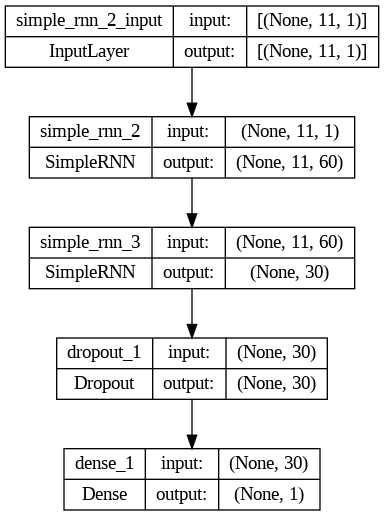

In [35]:
plot_model(model, to_file='simple_rnn_model.png', show_shapes=True, show_layer_names=True)

In [13]:
accsc = accuracy_score(y_test_bin,y_pred_bin)
f1 = f1_score(y_test_bin,y_pred_bin)
ps = precision_score(y_test_bin,y_pred_bin)
rs = recall_score(y_test_bin,y_pred_bin)

Score = {"Accuracy Score":accsc,"Precision Score":ps,"Recall Score":rs,"F1 Score":f1}

print(Score)

{'Accuracy Score': 0.9331026747523905, 'Precision Score': 0.9311716039498266, 'Recall Score': 0.973765733582652, 'F1 Score': 0.9519924694069658}


# Hyper-Parameter Tuning

###GridSearchCV

In [15]:
# params = {
#           'n_estimators': [20,50,100],
#           'max_samples': [0.5,1.0],
#           'max_features': [0.5,1.0],
#           }

# gridsearch_bin_rfc = GridSearchCV(estimator = RandomForestClassifier(), n_jobs=-1, param_grid =params, cv=5, verbose=1)
# gridsearch_bin_rfc.fit(x_train_bin,y_train_bin)

# params = {
#           'n_estimators': [20,50,100],
#           'learning_rate': [1,2,0.5]
#           }

# gridsearch_bin_abc = GridSearchCV(estimator = AdaBoostClassifier(), n_jobs=-1, param_grid =params, cv=5, verbose=1)
# gridsearch_bin_abc.fit(x_train_bin,y_train_bin)

params = {
          'weights': ["uniform", "distance"],
          'algorithm': ["ball_tree", "kd_tree", "brute"],
          }

gridsearch_bin_knn = GridSearchCV(estimator = KNeighborsClassifier(), n_jobs=-1, param_grid =params, cv=5, verbose=1)
gridsearch_bin_knn.fit(x_train_bin,y_train_bin)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [30]:
#  gridsearch_bin_rfc = pd.DataFrame.from_dict(gridsearch_bin_rfc.cv_results_)
gridsearch_bin_rfc.head(12)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_max_samples,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,14.126639,0.867896,0.132349,0.012299,0.5,0.5,20,"{'max_features': 0.5, 'max_samples': 0.5, 'n_e...",0.955837,0.955623,0.956477,0.954695,0.956406,0.955807,0.000645,11
1,36.244040,1.574474,0.369861,0.036345,0.5,0.5,50,"{'max_features': 0.5, 'max_samples': 0.5, 'n_e...",0.957476,0.956799,0.957404,0.956085,0.958402,0.957233,0.000770,8
2,70.154194,0.690872,0.884989,0.282907,0.5,0.5,100,"{'max_features': 0.5, 'max_samples': 0.5, 'n_e...",0.958581,0.958011,0.957475,0.958402,0.960113,0.958516,0.000884,4
3,22.727473,0.877733,0.174662,0.084099,0.5,1.0,20,"{'max_features': 0.5, 'max_samples': 1.0, 'n_e...",0.957441,0.957263,0.957582,0.957154,0.957546,0.957397,0.000165,7
4,56.821331,0.861252,0.381812,0.099932,0.5,1.0,50,"{'max_features': 0.5, 'max_samples': 1.0, 'n_e...",0.958546,0.959223,0.958616,0.959079,0.958794,0.958851,0.000262,3
5,116.454643,3.332049,0.881788,0.239233,0.5,1.0,100,"{'max_features': 0.5, 'max_samples': 1.0, 'n_e...",0.958403,0.959971,0.959400,0.959008,0.959614,0.959279,0.000538,1
6,27.487776,3.744573,0.146606,0.021036,1.0,0.5,20,"{'max_features': 1.0, 'max_samples': 0.5, 'n_e...",0.955801,0.955302,0.954980,0.954766,0.955764,0.955323,0.000413,12
7,65.124639,1.621796,0.314724,0.062372,1.0,0.5,50,"{'max_features': 1.0, 'max_samples': 0.5, 'n_e...",0.957476,0.957156,0.956120,0.956798,0.957617,0.957033,0.000537,9
8,129.579533,1.198202,0.755049,0.212212,1.0,0.5,100,"{'max_features': 1.0, 'max_samples': 0.5, 'n_e...",0.957619,0.958867,0.958366,0.957653,0.958616,0.958224,0.000506,6
9,43.888907,1.046178,0.188827,0.060536,1.0,1.0,20,"{'max_features': 1.0, 'max_samples': 1.0, 'n_e...",0.955765,0.957263,0.955657,0.956299,0.958544,0.956706,0.001081,10


###5	116.454643	3.332049	0.881788	0.239233	0.5	1.0	100	{'max_features': 0.5, 'max_samples': 1.0, 'n_e...	0.958403	0.959971	0.959400	0.959008	0.959614	0.959279	0.000538	1

In [40]:
# gridsearch_bin_abc = pd.DataFrame.from_dict(gridsearch_bin_abc.cv_results_)
gridsearch_bin_abc.head(9)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,3.605302,1.258622,0.176607,0.088820,1,20,"{'learning_rate': 1, 'n_estimators': 20}",0.929104,0.933916,0.930277,0.927497,0.932345,0.930628,0.002281,5
1,7.069605,1.618878,0.317966,0.076105,1,50,"{'learning_rate': 1, 'n_estimators': 50}",0.931670,0.935662,0.933414,0.929992,0.934341,0.933016,0.001994,2
2,15.332884,4.445451,0.903238,0.370922,1,100,"{'learning_rate': 1, 'n_estimators': 100}",0.934058,0.937801,0.932986,0.931240,0.934234,0.934064,0.002151,1
3,4.774215,1.598382,0.155652,0.056159,2,20,"{'learning_rate': 2, 'n_estimators': 20}",0.305899,0.304759,0.304021,0.306266,0.304163,0.305022,0.000909,7
4,7.132376,1.063491,0.281567,0.044723,2,50,"{'learning_rate': 2, 'n_estimators': 50}",0.305899,0.304759,0.304021,0.306266,0.304163,0.305022,0.000909,7
5,15.978074,4.586652,1.331540,0.887060,2,100,"{'learning_rate': 2, 'n_estimators': 100}",0.305899,0.304759,0.304021,0.306266,0.304163,0.305022,0.000909,7
6,5.467323,1.142926,0.274243,0.251109,0.5,20,"{'learning_rate': 0.5, 'n_estimators': 20}",0.927036,0.927036,0.930349,0.927176,0.927782,0.927876,0.001267,6
7,8.434454,3.107123,0.342940,0.125038,0.5,50,"{'learning_rate': 0.5, 'n_estimators': 50}",0.930351,0.932989,0.931489,0.927212,0.931988,0.930806,0.001988,4
8,15.196293,3.334748,0.559487,0.127611,0.5,100,"{'learning_rate': 0.5, 'n_estimators': 100}",0.932062,0.935270,0.932630,0.928780,0.933378,0.932424,0.002120,3


####2	15.332884	4.445451	0.903238	0.370922	1	100	{'learning_rate': 1, 'n_estimators': 100}	0.934058	0.937801	0.932986	0.931240	0.934234	0.934064	0.002151	1

In [18]:
# gridsearch_bin_knn = pd.DataFrame.from_dict(gridsearch_bin_knn.cv_results_)
gridsearch_bin_knn.head(6)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algorithm,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.101921,0.047780,3.040973,1.035388,ball_tree,uniform,"{'algorithm': 'ball_tree', 'weights': 'uniform'}",0.937839,0.937553,0.938979,0.939549,0.939532,0.938691,0.000842,2
1,0.087907,0.036568,2.401958,0.484353,ball_tree,distance,"{'algorithm': 'ball_tree', 'weights': 'distance'}",0.938409,0.937839,0.935843,0.934132,0.936110,0.936466,0.001525,5
2,0.045066,0.006215,0.443364,0.012796,kd_tree,uniform,"{'algorithm': 'kd_tree', 'weights': 'uniform'}",0.937839,0.937553,0.938979,0.939549,0.939532,0.938691,0.000842,2
3,0.041231,0.004647,0.144185,0.005720,kd_tree,distance,"{'algorithm': 'kd_tree', 'weights': 'distance'}",0.938409,0.937839,0.935843,0.934132,0.936110,0.936466,0.001525,5
4,0.008303,0.000228,0.770041,0.019269,brute,uniform,"{'algorithm': 'brute', 'weights': 'uniform'}",0.938409,0.938409,0.939549,0.939264,0.939532,0.939033,0.000519,1
5,0.009496,0.000809,0.424069,0.039981,brute,distance,"{'algorithm': 'brute', 'weights': 'distance'}",0.938409,0.938124,0.935843,0.933847,0.936395,0.936523,0.001659,4


In [19]:
clf = RandomForestClassifier(max_features=0.5)

clf.fit(x_train_bin,y_train_bin)
y_pred_bin = clf.predict(x_test_bin)

accsc = accuracy_score(y_test_bin,y_pred_bin)
f1 = f1_score(y_test_bin,y_pred_bin)
ps = precision_score(y_test_bin,y_pred_bin)
rs = recall_score(y_test_bin,y_pred_bin)

Score = {"Accuracy Score":accsc,"Precision Score":ps,"Recall Score":rs,"F1 Score":f1}

print(Score)

{'Accuracy Score': 0.9369736450220839, 'Precision Score': 0.9468065609823146, 'Recall Score': 0.9614668825488992, 'F1 Score': 0.954080407763763}
